In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from astroML.time_series import \
    lomb_scargle, lomb_scargle_bootstrap
%matplotlib inline

#Hands-On Exercise 3:
Period Finding
========
One of the fundamental tasks of time-domain astronomy is determining if a source is periodic, and if so, measuring the period.  Period measurements are a vital first step for more detailed scientific study, which may include source classification (e.g., RR Lyrae, W Uma), lightcurve modeling (binaries), or luminosity estimation (Cepheids).

Binary stars in particular have lightcurves which may show a wide variety of shapes, depending on the nature of the stars and the system geometry.

In this workbook we will develop a basic toolset for the generic problem of finding periodic sources.

***
by Eric Bellm (2014-2015)

Let's use the relative-photometry corrected light curves we built in Excercise 2. We'll use the utility function `source_lightcurve` to load the columns MJD, magnitude, and magnitude error.  Note that we will use days as our time coordinate throughout the homework.

In [2]:
# point to our previously-saved data
from ztf_summerschool import source_lightcurve
reference_catalog = '../data/PTF_Refims_Files/PTF_d022683_f02_c06_u000114210_p12_sexcat.ctlg'
outfile = reference_catalog.split('/')[-1].replace('ctlg','shlv')

We'll start by loading the data from our favorite star, which has coordinates $\alpha_\mathrm{J2000}, \delta_\mathrm{J2000} = (312.503802, -0.706603)$.

In [6]:
ra_fav, dec_fav = (312.503802, -0.706603)
mjds, mags, magerrs = source_lightcurve('../data/'+outfile, ra_fav, dec_fav)

## Exercise 1

Complete this function for plotting the lightcurve:


In [11]:
# define plot function
def plot_data(# COMPLETE THIS LINE
    plt.errorbar( # COMPLETE THIS LINE
        color=color, fmt = '_', capsize=0)
    plt.xlabel('Date (MJD)')
    plt.ylabel('Magnitude')

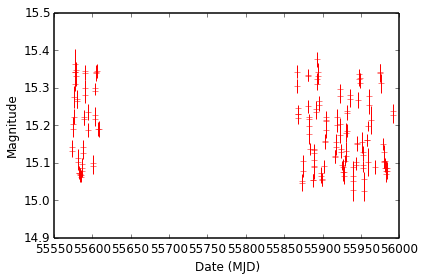

In [13]:
# run plot function
plot_data(mjds, mags, magerrs)

## The Lomb Scargle Periodogram

The [Lomb-Scarge Periodogram](http://adsabs.harvard.edu/abs/1982ApJ...263..835S) provides a method for searching for periodicities in time-series data.  It is comparable to the discrete Fourier Transform, but may be applied to irregularly sampled data.  The periodogram gives as output the relative significance of a least-squares sinusoidal fit to the data as a function of frequency.

Much of this presentation follows Ch. 10 of [Ivezic et al.](http://press.princeton.edu/titles/10159.html)

We use the "[generalized](http://adsabs.harvard.edu/abs/2009A%26A...496..577Z)" LS version implemented in astroML rather than the "standard" version implemented in scipy: the generalized version accounts correctly for error bars that differ from point to point.

In [ ]:
# documentation for the lomb_scargle function
help(lomb_scargle)

## Exercise 2

Complete this function to generate the frequency bins at which to evaluate the LS periodogram.

The minimum frequency should be 2 pi / (t_max - t_min).

Choosing the maximum frequency is more complicated (see Ivezic et al. 10.3.2).  Let's use pi / dt, where dt = median(time between observations).

Generate a linear grid of frequencies with `np.linspace` using bins of 0.1 dt.


In [ ]:
# define frequency function
def frequency_grid(times):
    freq_min = # COMPLETE
    freq_max = # COMPLETE
    n_bins = # COMPLETE
    return np.linspace(freq_min, freq_max, n_bins)

In [15]:
# run frequency function
omegas = frequency_grid(data_R['epoch'])

In some cases you'll want to generate the frequency grid by hand, either to extend to higher frequencies (shorter periods) than found by default, to avoid generating too many bins, or to get a more precise estimate of the period.  In that case use the following code:

In [ ]:
# provided alternate frequency function
def alt_frequency_grid(Pmin, Pmax):
    """Generate an angular frequency grid between Pmin and Pmax (assumed to be in days)"""
    freq_min = 2*np.pi / Pmin
    freq_max = 2*np.pi / Pmax
    return np.linspace(freq_min, freq_max, 5000)

## Exercise 3

Calculate the LS periodiogram and plot the power.

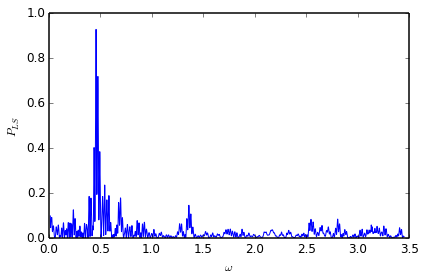

In [18]:
# calculate and plot LS periodogram
P_LS = lomb_scargle( # COMPLETE
plt.plot(omegas, P_LS)
plt.xlabel('$\omega$')
plt.ylabel('$P_{LS}$')

In [19]:
# provided: define function to find best period
def LS_peak_to_period(omegas, P_LS):
    """find the highest peak in the LS periodogram and return the corresponding period."""
    max_freq = omegas[np.argmax(P_LS)]
    return 2*np.pi/max_freq

In [20]:
# run function to find best period
best_period = LS_peak_to_period(omegas, P_LS)
print "Best period: {} days".format(best_period)

Best period: 13.6785413137 days


## Exercise 4
Complete this function that returns the phase of an observation (in the range 0-1) given its period.  For simplicity set the zero of the phase to be the time of the initial observation.

Hint: Consider the python modulus operator, `%`.

Add a keyword that allows your function to have an optional user-settable time of zero phase, for use with multiple bands

In [21]:
# define function to phase lightcurves
def phase(time, period, t0 = None):
    """ Given an input array of times and a period, return the corresponding phase."""
    if t0 is None:
        t0 = time[0]
    return # COMPLETE

## Exercise 5

Plot the phased lightcurve at the best-fit period.

In [22]:
# define function to plot phased lc
def plot_phased_lc(data, period, t0=None, color='red'):
    phases = phase(data['epoch'], period, t0=t0)
    plt.errorbar(phases,data['mag'],yerr=data['magerr'],
        color=color, fmt = '_', capsize=0)
    plt.xlabel('Phase')
    plt.ylabel('Magnitude')

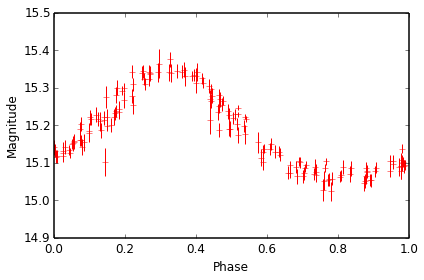

In [23]:
# run function to plot phased lc
plot_phased_lc(data_R, best_period)
# uncomment below to plot g-band data
#plot_phased_lc(data_g, best_period, color='green')
#set_mag_limits([data_R,data_g])

## [Challenge] Exercise 6

Calculate the chance probability of finding a LS peak higher than the observed value in random data observed at the specified intervals: use `lomb_scargle_bootstrap` and `np.percentile` to find the 95 and 99 percent significance levels and plot them over the LS power.

In [ ]:
D = lomb_scargle_bootstrap(# COMPLETE
sig99, sig95 = np.percentile(# COMPLETE
plt.plot(omegas, P_LS)
plt.plot([omegas[0],omegas[-1]], sig99*np.ones(2),'--')
plt.plot([omegas[0],omegas[-1]], sig95*np.ones(2),'--')
plt.xlabel('$\omega$')
plt.ylabel('$P_{LS}$')

## [Challenge] Exercise 7

Now try finding the periods of these sources with more complex light curves:

* variableB 
* variableC (use `alt_frequency_grid`) 
* variableD (very hard with LS! use `alt_frequency_grid`)

*Note on alternate algorithms*

Lomb-Scargle is equivalent to fitting a sinusoid to the phased data, but many kinds of variable stars do not have phased lightcurves that are well-represented by a sinusoid.  Other algorithms, such as those that attempt to minimize the dispersion within phase bins over a grid of trial phases, may be more successful in such cases.  See [Graham et al (2013)](http://adsabs.harvard.edu/abs/2013MNRAS.434.3423G) for a review.  

AstroML also includes [code](http://www.astroml.org/book_figures/chapter10/fig_LINEAR_LS.html) (see also `astroML.time_series.multiterm_periodogram`) for including multiple Fourier components in the fit, which can better fit arbitrary lightcurves.

*Other effects to consider*

Real data may have *aliases*--frequency components that appear because of the sampling of the data, such as once per night.  Bootstrap significance tests (and experience) can help rule these out.

Many eclipsing binaries have primary and secondary eclipses, often with comparable depths.  The period found by LS (which fits a single sinusoid) will thus often be only half of the true period.  Plotting the phased lightcurve at double the LS period is often the easiest way to determine the true period. 

## References and Further Reading

Scargle, J. 1982, [ApJ 263, 835](http://adsabs.harvard.edu/abs/1982ApJ...263..835S)

Zechmeister, M., and Kürster, M. 2009, [A&A 496, 577](http://adsabs.harvard.edu/abs/2009A%26A...496..577Z)

Graham, M. et al. 2013, [MNRAS 434, 3423](http://adsabs.harvard.edu/abs/2013MNRAS.434.3423G)

[Statistics, Data Mining, and Machine Learning in Astronomy](http://press.princeton.edu/titles/10159.html) (Ivezic, Connolly, VanderPlas, & Gray)